<h1 align="center"><a href="https://github.com/sborquez/gerumo/">*</a> GeRUMo - Gamma-ray Events Reconstructor with Uncertain models</h1>

<h2 align="center">BMO ensemble methods</h2>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2f/Cta_concept.jpg" width="30%" alt="icon"></img>
</center>

## Setup

The first step is to sync this notebook with Google Drive, and change directory to gerumo repository.

#### Colab Setup

In [ ]:
!pip install -q ctaplot POT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd "/content/drive/My Drive/Projects/gerumo"
!ls

#### Local Setup

In [1]:
%cd ..

/mnt/d/sebas/Projects/gerumo


## Load Gerumo and extra modules.

In [2]:
from gerumo import *

import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

## Load assembler generator 

In [5]:
ret = load_dataset_from_assembler_configuration("train/config/local/alt_az/BMO_assembler_methods/bmo_assembler_kde.json", include_samples_dataset=True)
(assembler_generator, assembler_dataset), (assembler_sample_generator, assembler_sample_dataset) = ret

/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/rei/miniconda3/envs/gerumo/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


4


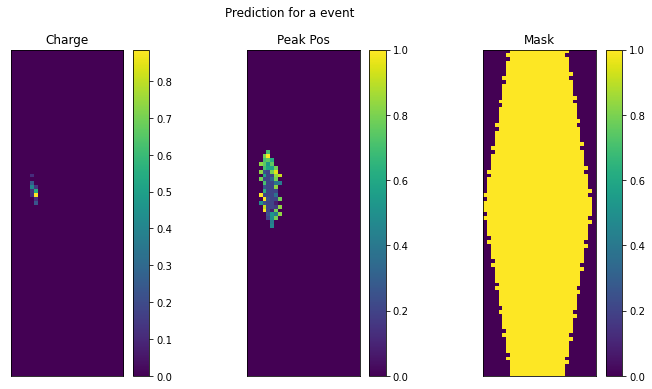

In [26]:
b = 1 #3
i = 3 #6

X_batch, y_batch, meta_batch = assembler_generator[b]
Xi = X_batch[i]
y_i_true = y_batch[i]
Xi_mst = Xi["MST_FlashCam"]
#print(len(Xi_mst[0]))
# telescope t0
Xi_mst_t0 = (Xi_mst[0][0], Xi_mst[1][0]) # (image, telescope_features)
plot_input_sample(Xi_mst_t0[0], input_image_mode='simple-shift', input_features_sample=Xi_mst_t0[1], make_simple=True)

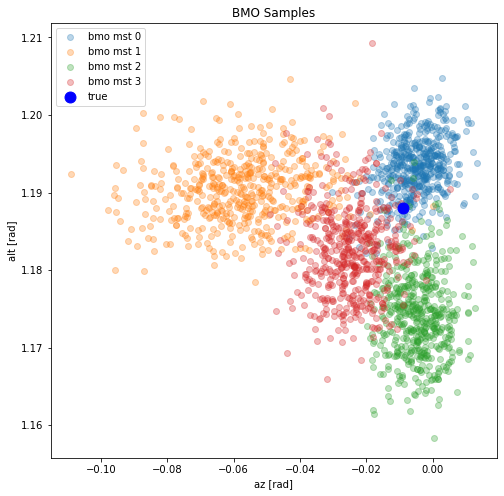

In [34]:
plt.figure(figsize=(8,8))
[plt.scatter(y_kde_j.dataset[1,:], y_kde_j.dataset[0,:], alpha=.3, label=f"bmo mst {s}") for s, y_kde_j in enumerate(y_i_all)];
plt.scatter(y_i_true[1], y_i_true[0], marker="o", s=120, label="true", c="b"); plt.legend();
plt.title("BMO Samples");plt.xlabel("az [rad]"); plt.ylabel("alt [rad]");

## BMO Assembler methods

### Method 1: Resample and KDE

For each observation take the dataset used to build its KDE, then apply a new KDE estimation using all datasets.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph


/mnt/d/sebas/Projects/gerumo/gerumo/visualization/metrics.py:335: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(im, ax=axis, extend='max')


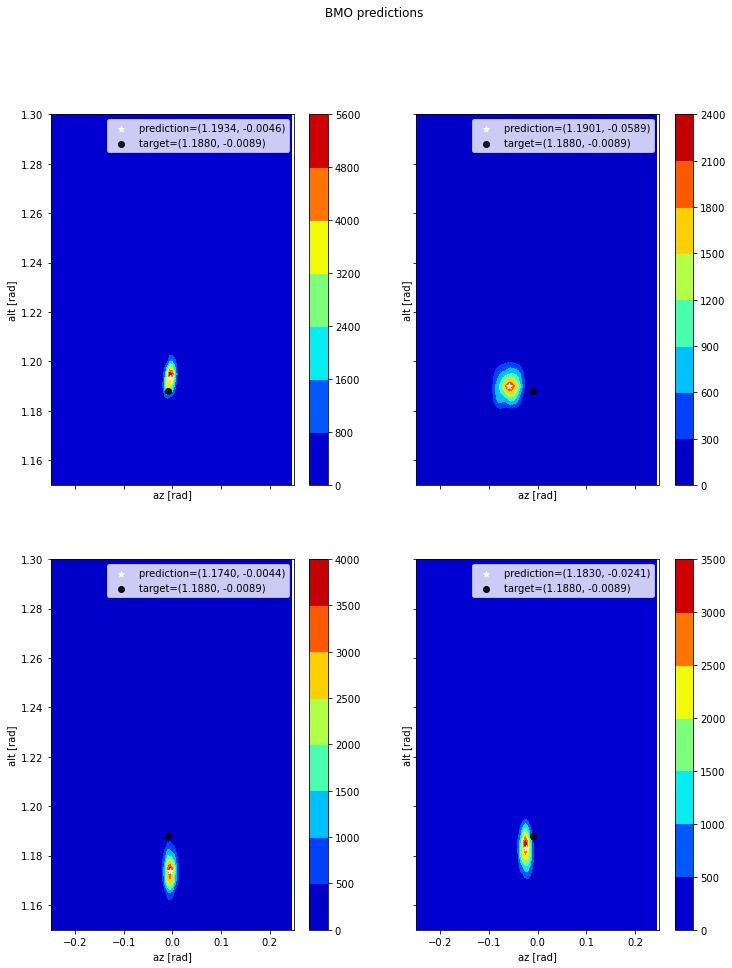

In [35]:
# method 1
assembler_kde_config_file = "train/config/local/alt_az/BMO_assembler_methods/bmo_assembler_kde.json"
config_kde, assembler_kde = load_assembler_from_configuration(assembler_kde_config_file, ASSEMBLERS)

y_i_all = assembler_kde.model_estimation(Xi_mst, "MST_FlashCam")
fig, axs = plt.subplots(int(np.ceil(len(y_i_all)/2)), 2, sharex=True, sharey=True, figsize=(12, 15))
plt.suptitle("BMO predictions")
for i, y_i_t in enumerate(y_i_all):
    #if i == 9: break
    i,j = i//2, i%2
    y_i_t_point = y_i_t.dataset.mean(axis=1)
    show_pdf_2d(y_i_t, y_i_t_point, config_kde["targets"], config_kde["target_domains"], targets_values=y_i_true, axis=axs[i,j]);

#### Ensemble

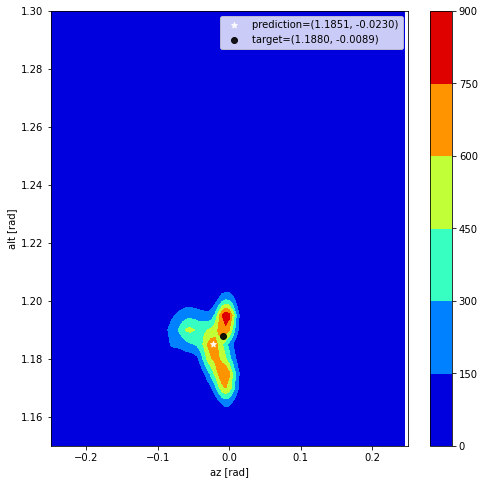

In [38]:
y_i_kde = assembler_kde.resample(y_i_all)
y_i_kde_point = assembler_kde.point_estimation([y_i_kde])[0]

show_pdf_2d(y_i_kde, y_i_kde_point, config_kde["targets"], config_kde["target_domains"],  targets_values=y_i_true);

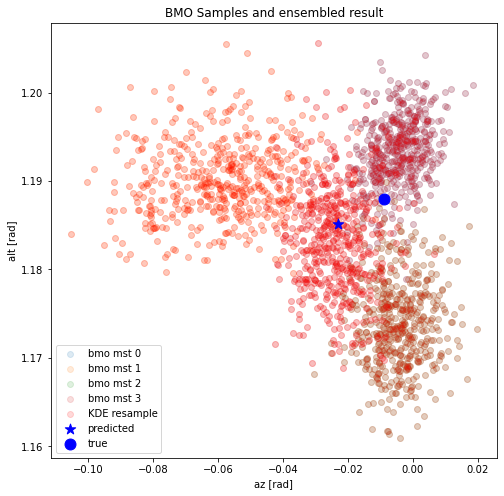

In [44]:
plt.figure(figsize=(8,8))
[plt.scatter(y_kde_j.dataset[1,:], y_kde_j.dataset[0,:], alpha=.15, label=f"bmo mst {s}") for s, y_kde_j in enumerate(y_i_all)];
plt.scatter(y_i_kde.dataset[1, :], y_i_kde.dataset[0, :], alpha=0.15, c="r", label="KDE resample")
plt.scatter(y_i_kde_point[1], y_i_kde_point[0], marker="*", s=120, label="predicted", c="b")
plt.scatter(y_i_true[1], y_i_true[0], marker="o", s=120, label="true", c="b"); plt.legend();
plt.title("BMO Samples and ensembled result");plt.xlabel("az [rad]"); plt.ylabel("alt [rad]");

## Method 2: Weighted Mean

For each sample, evaluate its mean and std values, then calculate the avegare of means weighted by its std.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph


/mnt/d/sebas/Projects/gerumo/gerumo/visualization/metrics.py:335: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(im, ax=axis, extend='max')


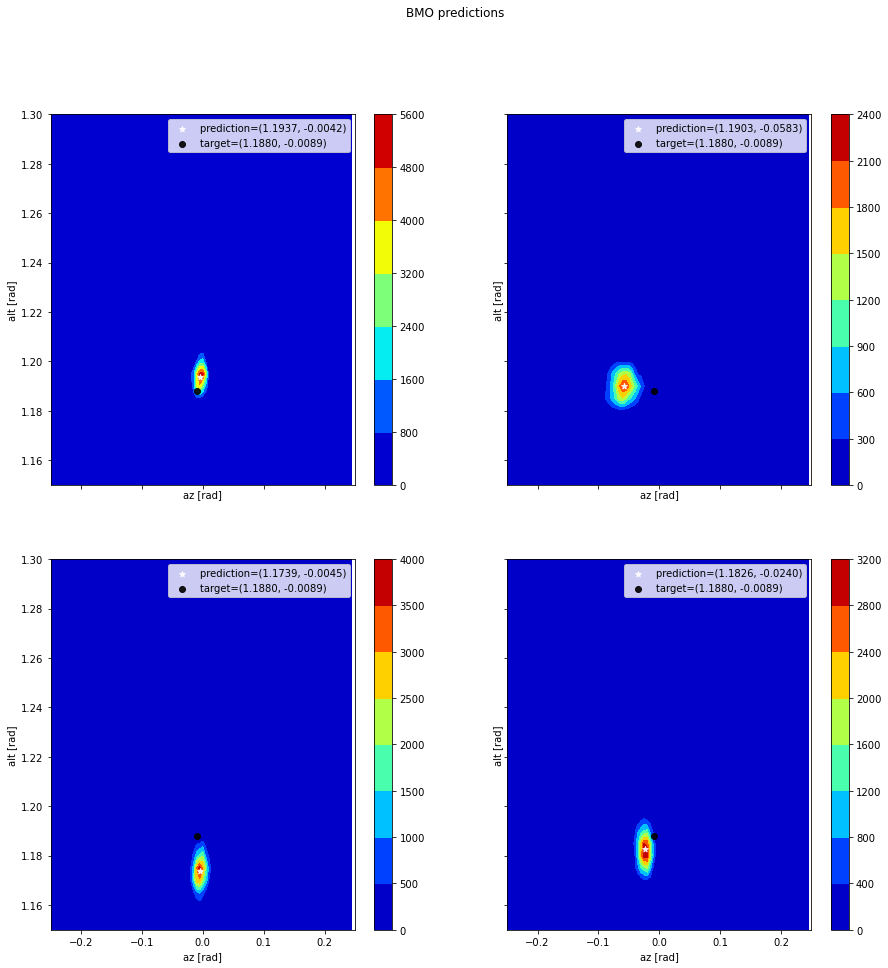

In [46]:
# method 2
assembler_mean_config_file = "/mnt/d/sebas/Projects/gerumo/train/config/local/alt_az/BMO_assembler_methods/bmo_assembler_mean_var.json"
config_mean, assembler_mean=load_assembler_from_configuration(assembler_mean_config_file, assemblers=ASSEMBLERS)

y_i_all = assembler_mean.model_estimation(Xi_mst, "MST_FlashCam")
fig, axs = plt.subplots(int(np.ceil(len(y_i_all)/2)), 2, sharex=True, sharey=True, figsize=(15, 15))
plt.suptitle("BMO predictions")
for i, y_i_t in enumerate(y_i_all):
    #if i == 9: break
    i,j = i//2, i%2
    y_i_t_point = y_i_t.dataset.mean(axis=1)
    show_pdf_2d(y_i_t, y_i_t_point, config_mean["targets"], config_mean["target_domains"], targets_values=y_i_true, axis=axs[i,j]);

#### Ensemble

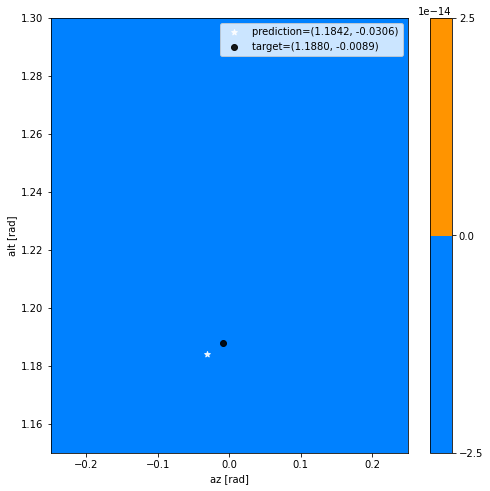

In [47]:
y_i_wmean = assembler_mean.weighted_mean(y_i_all)
y_i_wmean_point = assembler_mean.point_estimation([y_i_wmean])[0]

show_pdf_2d(y_i_wmean, y_i_wmean_point, config_mean["targets"], config_mean["target_domains"],  targets_values=y_i_true);

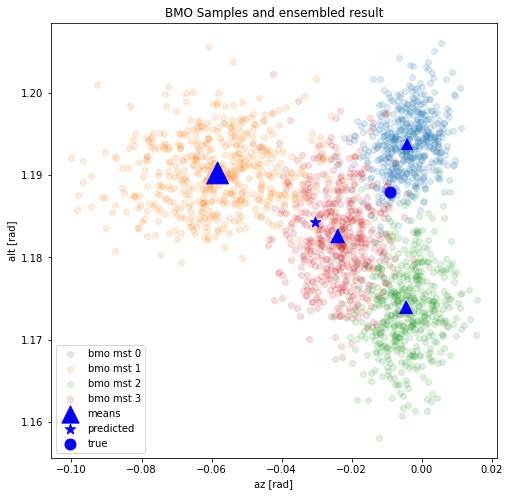

In [67]:
plt.figure(figsize=(8,8))
[plt.scatter(y_kde_j.dataset[1,:], y_kde_j.dataset[0,:], alpha=.15, label=f"bmo mst {s}") for s, y_kde_j in enumerate(y_i_all)];
means = np.array([y_kde_j.dataset.mean(axis=1) for y_kde_j in y_i_all])
stds = np.array([y_kde_j.dataset.std(axis=1) for y_kde_j in y_i_all])
plt.scatter(means[:, 1], means[:, 0], marker="^", s=2*1e6*(np.linalg.norm(stds, axis=1)**2), c="b", label="means");
plt.scatter(y_i_wmean_point[1], y_i_wmean_point[0], marker="*", s=120, label="predicted", c="b")
plt.scatter(y_i_true[1], y_i_true[0], marker="o", s=120, label="true", c="b"); plt.legend();
plt.title("BMO Samples and ensembled result");plt.xlabel("az [rad]"); plt.ylabel("alt [rad]");

In [146]:
y_i_wmean.mean

array([ 1.18424714, -0.03057446])

## Method 3: Wasserstein Barycenters

Obtain the "average" distribution of predicted distributions, using the wasserstein barycenter.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph


/mnt/d/sebas/Projects/gerumo/gerumo/visualization/metrics.py:335: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(im, ax=axis, extend='max')


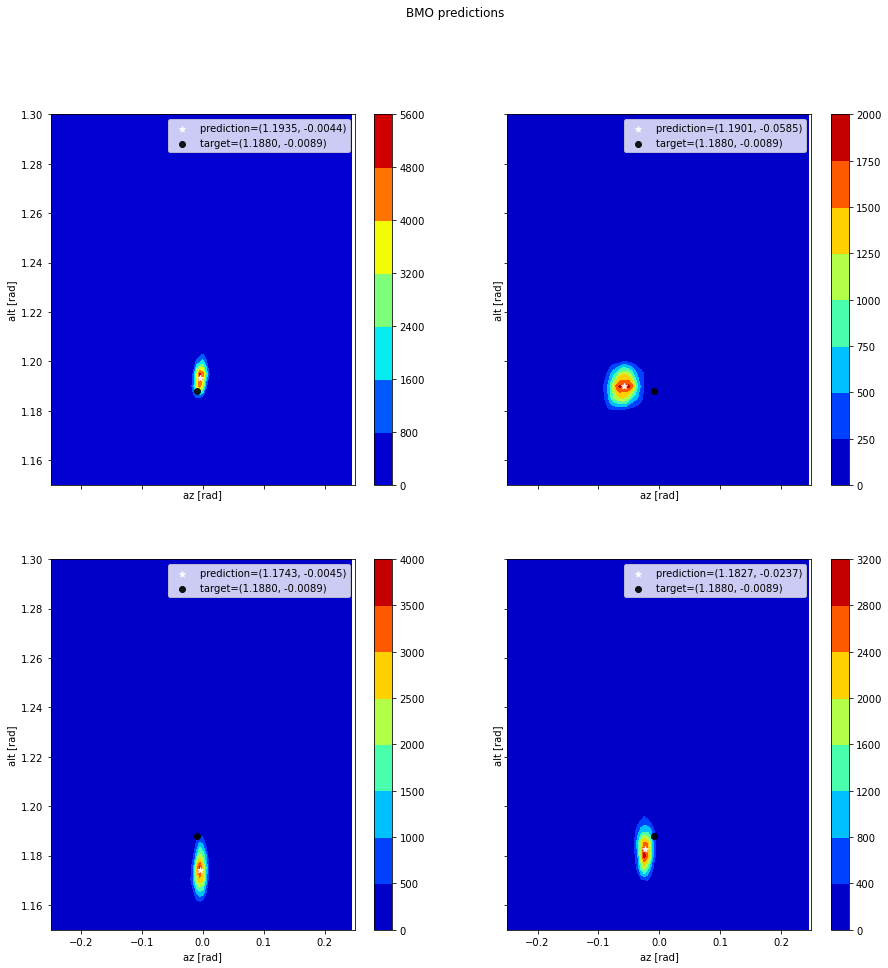

In [69]:
## method 3
assembler_wbarycenter_config_file = "/mnt/d/sebas/Projects/gerumo/train/config/local/alt_az/BMO_assembler_methods/bmo_assembler_wasserstein.json"
config_wbarycenter, assembler_wbarycenter = load_assembler_from_configuration(assembler_wbarycenter_config_file, assemblers=ASSEMBLERS)

y_i_all = assembler_wbarycenter.model_estimation(Xi_mst, "MST_FlashCam")
fig, axs = plt.subplots(int(np.ceil(len(y_i_all)/2)), 2, sharex=True, sharey=True, figsize=(15, 15))
plt.suptitle("BMO predictions")
for i, y_i_t in enumerate(y_i_all):
    #if i == 9: break
    i,j = i//2, i%2
    y_i_t_point = y_i_t.dataset.mean(axis=1)
    show_pdf_2d(y_i_t, y_i_t_point, config_wbarycenter["targets"], config_wbarycenter["target_domains"], targets_values=y_i_true, axis=axs[i,j]);

#### Ensemble

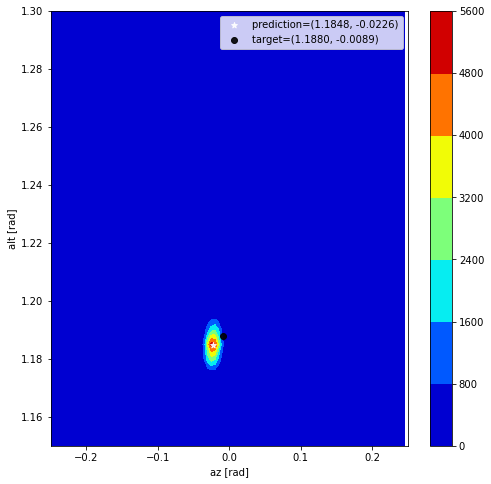

In [70]:
y_i_wass = assembler_wbarycenter.wasserstein_barycenter(y_i_all)
y_i_wass_point = assembler_wbarycenter.point_estimation([y_i_wass])[0]
show_pdf_2d(y_i_wass, y_i_wass_point, config_wbarycenter["targets"], config_wbarycenter["target_domains"],  targets_values=y_i_true);

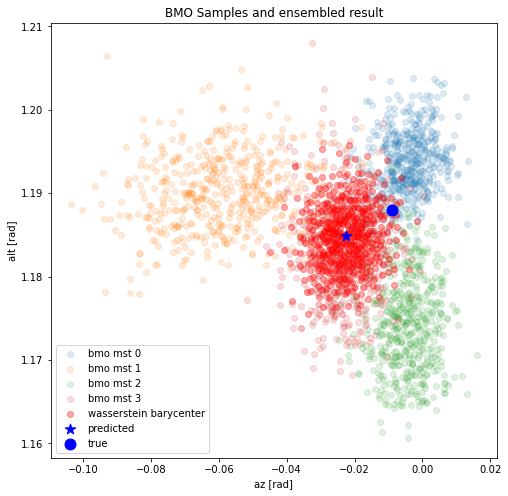

In [74]:
plt.figure(figsize=(8,8))
[plt.scatter(y_kde_j.dataset[1,:], y_kde_j.dataset[0,:], alpha=.15, label=f"bmo mst {s}") for s, y_kde_j in enumerate(y_i_all)];
plt.scatter(y_i_wass.dataset[1,:], y_i_wass.dataset[0,:], alpha=.35, label="wasserstein barycenter", c="r")
plt.scatter(y_i_wass_point[1], y_i_wass_point[0], marker="*", s=120, label="predicted", c="b")
plt.scatter(y_i_true[1], y_i_true[0], marker="o", s=120, label="true", c="b"); plt.legend();
plt.title("BMO Samples and ensembled result");plt.xlabel("az [rad]"); plt.ylabel("alt [rad]");

## Method 4 norm_prod

Find the intersections of multiples distributions, by multiplying a discrete approximations of the pdf in a space bounded.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph


/mnt/d/sebas/Projects/gerumo/gerumo/visualization/metrics.py:335: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(im, ax=axis, extend='max')


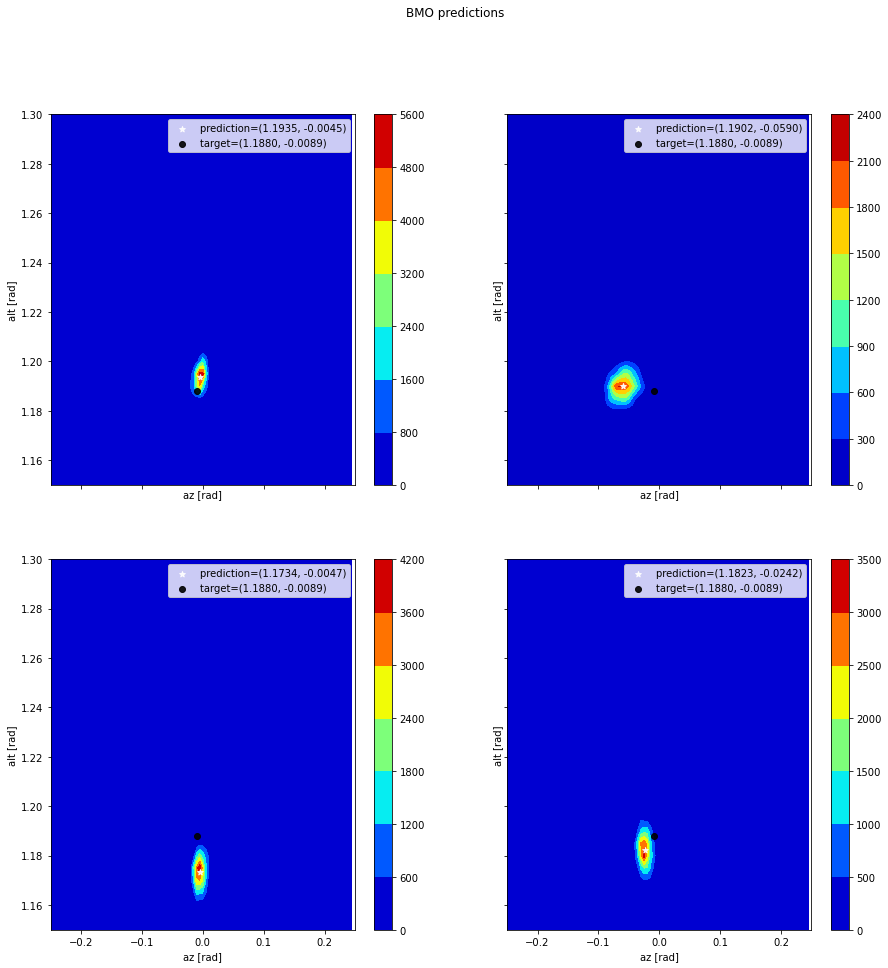

In [75]:
# method 4
assembler_np_config_file = "/mnt/d/sebas/Projects/gerumo/train/config/local/alt_az/BMO_assembler_methods/bmo_assembler_norm_prod.json"
config_np, assembler_np = load_assembler_from_configuration(assembler_np_config_file, assemblers=ASSEMBLERS)

y_i_all = assembler_np.model_estimation(Xi_mst, "MST_FlashCam")
fig, axs = plt.subplots(int(np.ceil(len(y_i_all)/2)), 2, sharex=True, sharey=True, figsize=(15, 15))
plt.suptitle("BMO predictions")
for i, y_i_t in enumerate(y_i_all):
    #if i == 9: break
    i,j = i//2, i%2
    y_i_t_point = y_i_t.dataset.mean(axis=1)
    show_pdf_2d(y_i_t, y_i_t_point, config_np["targets"], config_np["target_domains"], targets_values=y_i_true, axis=axs[i,j]);

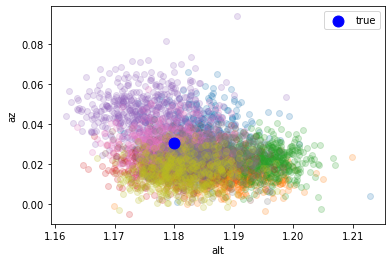

In [24]:
[plt.scatter(y_kde_j.dataset[0,:], y_kde_j.dataset[1,:], alpha=0.2) for y_kde_j in y_i_all[:]];
plt.scatter(y_i_true[0], y_i_true[1], marker="o", s=120, label="true", c="b"); plt.legend();
plt.xlabel("alt"); plt.ylabel("az");

#### Ensemble

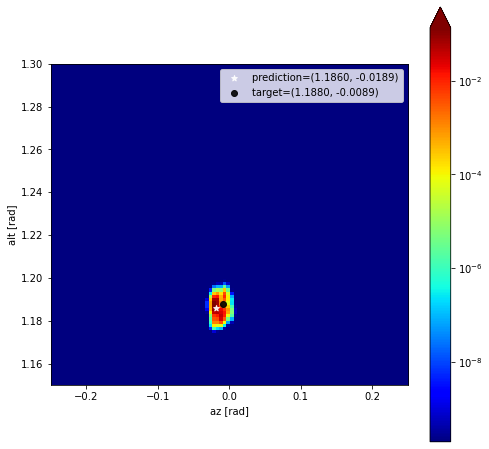

In [76]:
y_i_np = assembler_np.normalized_product(y_i_all)
y_i_np_point = assembler_np.point_estimation([y_i_np])[0]
show_pmf_2d(y_i_np, y_i_np_point, config_np["targets"], config_np["target_domains"], targets_values=y_i_true);

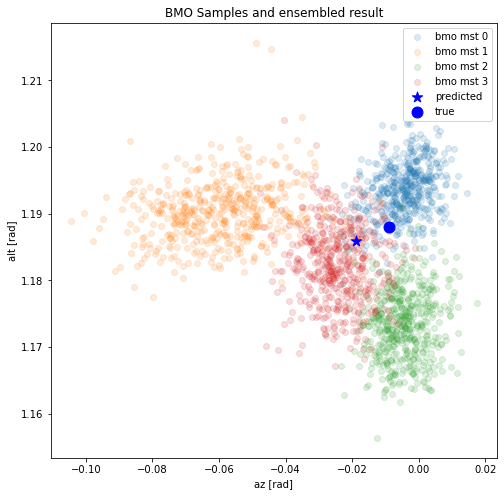

In [77]:
plt.figure(figsize=(8,8))
[plt.scatter(y_kde_j.dataset[1,:], y_kde_j.dataset[0,:], alpha=.15, label=f"bmo mst {s}") for s, y_kde_j in enumerate(y_i_all)];
plt.scatter(y_i_np_point[1], y_i_np_point[0], marker="*", s=120, label="predicted", c="b")
plt.scatter(y_i_true[1], y_i_true[0], marker="o", s=120, label="true", c="b"); plt.legend();
plt.title("BMO Samples and ensembled result");plt.xlabel("az [rad]"); plt.ylabel("alt [rad]");

## Points comparison

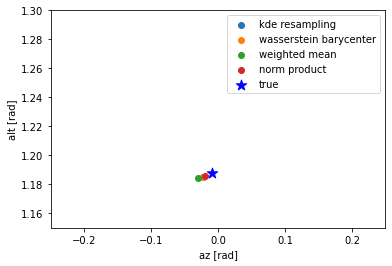

In [84]:
plt.scatter(y_i_kde_point[1], y_i_kde_point[0], label="kde resampling");
plt.scatter(y_i_wass_point[1], y_i_wass_point[0], label="wasserstein barycenter");
plt.scatter(y_i_wmean_point[1], y_i_wmean_point[0], label="weighted mean");
plt.scatter(y_i_np_point[1], y_i_np_point[0], label="norm product");
plt.scatter(y_i_true[1], y_i_true[0], marker="*", s=120, label="true", c="b"); plt.legend();
plt.ylim(config_np["target_domains"]["alt"]);plt.xlim(config_np["target_domains"]["az"]);
plt.ylabel("alt [rad]"); plt.xlabel("az [rad]");

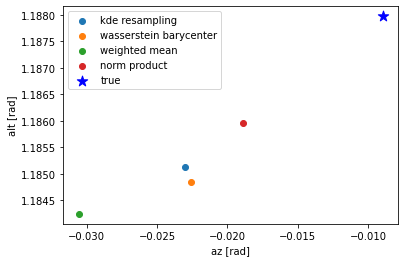

In [83]:
plt.scatter(y_i_kde_point[1], y_i_kde_point[0], label="kde resampling");
plt.scatter(y_i_wass_point[1], y_i_wass_point[0], label="wasserstein barycenter");
plt.scatter(y_i_wmean_point[1], y_i_wmean_point[0], label="weighted mean");
plt.scatter(y_i_np_point[1], y_i_np_point[0], label="norm product");
plt.scatter(y_i_true[1], y_i_true[0], marker="*", s=120, label="true", c="b"); plt.legend();
plt.ylabel("alt [rad]"); plt.xlabel("az [rad]");

### Averaging vs Agreement

Next we will show the difference between the averaging methods (Resample, Wasserstein barycenter and weighted mean) vs the agreement method (normalized product)

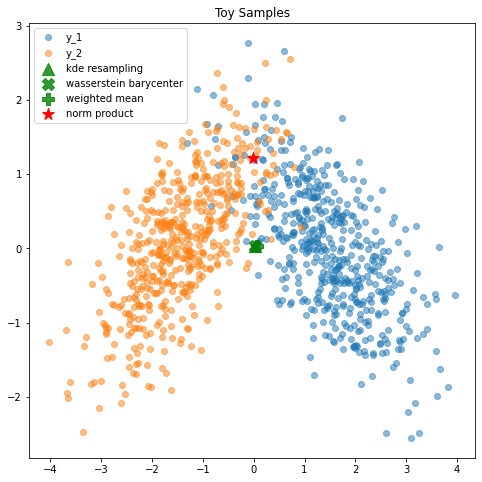

In [131]:
# toy data
y_1 = st.gaussian_kde(st.multivariate_normal.rvs(mean=[0, 1.5], cov=[[0.75, -0.5],
                                                                   [-0.5, 0.75]], size=500).T)

y_2 = st.gaussian_kde(st.multivariate_normal.rvs(mean=[0, -1.5], cov=[[0.75, .5],
                                                                    [0.5, 0.75]], size=500).T)

plt.figure(figsize=(8,8))
# moth diagram
plt.scatter(y_1.dataset[1,:], y_1.dataset[0,:], alpha=.5, label=f"y_1")
plt.scatter(y_2.dataset[1,:], y_2.dataset[0,:], alpha=.5, label=f"y_2")

# predictions
kde   = assembler_kde.point_estimation([assembler_kde.resample([y_1, y_2])])[0]
wbary = assembler_wbarycenter.point_estimation([assembler_wbarycenter.wasserstein_barycenter([y_1, y_2])])[0]
wmean = assembler_mean.point_estimation([assembler_mean.weighted_mean([y_1, y_2])])[0]
nprod = assembler_np.point_estimation([assembler_np.normalized_product([y_1, y_2])])[0]

plt.scatter(kde[1], kde[0], label="kde resampling", alpha=0.8, s=150, c="g", marker="^");
plt.scatter(wbary[1], wbary[0], label="wasserstein barycenter", alpha=.8, s=150, c="g", marker="X");
plt.scatter(wmean[1], wmean[0], label="weighted mean", alpha=.8, s=150, c="g", marker="P");
plt.scatter(nprod[1], nprod[0], label="norm product", alpha=1, s=150, c="r", marker="*");

plt.legend();
plt.title("Toy Samples"); 